In [1]:
import sys
sys.path.append("G:/DREAM/from_github/PAMFluo")  # path contains python_file.py

from VoltageIntensityClass import VoltageIntensity
import pandas as pd
import numpy as np
import alienlab.utils
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename, askopenfilenames
import alienlab.plot
from alienlab.utils import *
from alienlab.regression_func import *
import json
#from VoltageIntensityClass import VoltageIntensity
import os
from scipy import optimize


import pwlf

p = alienlab.plot.PlotFigure()
p.extension = ".pdf"
p.date = False
p.save_folder = "G:/DREAM/from_github/thesis/Figures/biophysical_validation/"
p.figsize = (10,10)
p.fontsize = 18
p.fonttick = 12

In [2]:
def multiline_fit(x, y):

    y = np.array([y for _, y in sorted(zip(x, y))])
    x = np.sort(x)

    my_pwlf = pwlf.PiecewiseLinFit(x, y)
    breaks = my_pwlf.fit(2)
    print(breaks)


    x_hat = np.linspace(x.min(), x.max(), 100)
    y_hat = my_pwlf.predict(x_hat)
                            
    return x_hat, y_hat, breaks


def residuals(parameters,x_data,y_observed,func):
    '''
    Compute residuals of y_predicted - y_observed
    where:
    y_predicted = func(parameters,x_data)
    '''
    return func(parameters,x_data) - y_observed

def platt(parameters, xdata):
    M = parameters[0]
    alpha = parameters[1]
    return M*(1- np.exp(-alpha*xdata/M))

def modele_direct(parameters, x_data):
    a = parameters[0]
    b = parameters[1]
    c = parameters[2]
    d = parameters[3]
    e = parameters[4]
    return (a*x_data +b*np.sqrt(c*I**2+d*I+1)+e)/I

def modele_inverse(parameters, x_data):
    a = parameters[0]
    b = parameters[1]
    c = parameters[2]
    d = parameters[3]
    e = parameters[4]
    f = parameters[5]
    return a*I + b*np.sqrt(c*I**2+d*I+1) + e

### Measuring light calibration

### Saturating pulse calibration

In [3]:
file = "G:/DREAM/from_github/PAMFluo/Experiments/2021-04-16_15_59_SP_calibration/2021-04-16_16_18_SP_calibration.csv" #askopenfilename()
print(file)

G:/DREAM/from_github/PAMFluo/Experiments/2021-04-16_15_59_SP_calibration/2021-04-16_16_18_SP_calibration.csv


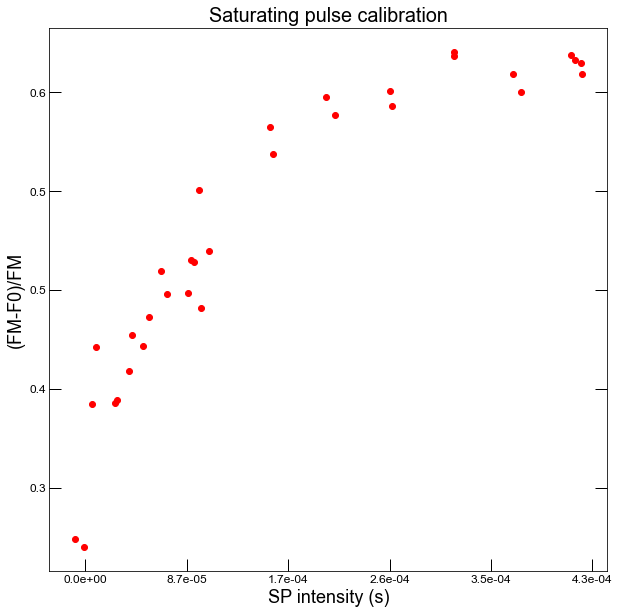

<Figure size 432x288 with 0 Axes>

In [4]:
headers, data = pandas_to_arrays(file)
p.xlabel = "SP intensity (s)"
p.ylabel = "(FM-F0)/FM"
p.title = "Saturating pulse calibration"
p.majorFormatterx = "%0.1e"
p.majorFormattery = "%0.1f"
p.marker_list = ["o", ""]
p.linestyle_list = ["", "-"]
blank_level = np.mean(data[6][1::2])
FM_pulse = data[2][1::2]
F0 = data[2][0]
intensity = data[10][0::2]
intensity_blank = np.mean(data[10][1::2])
fig = p.plotting(intensity[:-1]-intensity_blank, (FM_pulse-F0)/(FM_pulse - blank_level)) #1 pulse every 0.25s
p.save_name = "SP_calibration"
p.saving(fig)
x=1

[-8.95581109e-06  1.51038402e-04  4.25993534e-04]


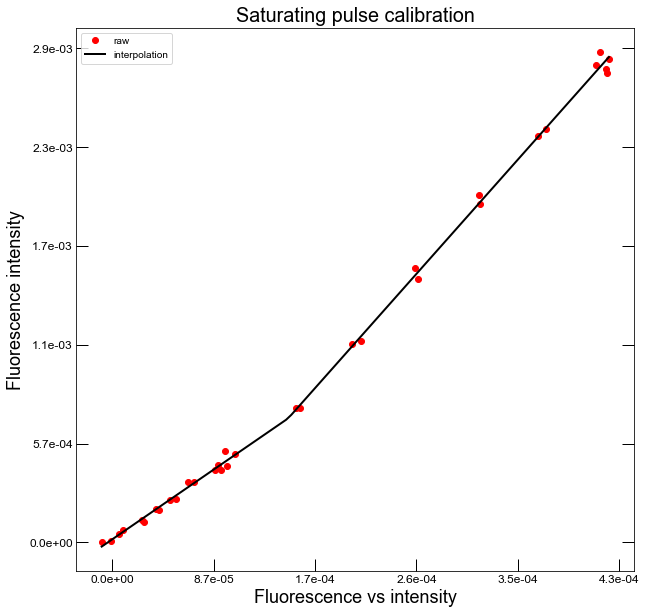

<Figure size 432x288 with 0 Axes>

In [5]:
x = intensity[:]-intensity_blank
y = data[6][0::2]-blank_level

x_hat, y_hat, breaks = multiline_fit(x, y)
p.majorFormatterx = "%0.1e"
p.majorFormattery = "%0.1e"
p.xlabel = "Fluorescence vs intensity"
p.ylabel = "Fluorescence intensity"
p.marker_list = ["o", ""]
p.linestyle_list = ["", "-"]
p.label_list = ["raw", "interpolation"]
fig = p.plotting([x,x_hat], [y, y_hat])
p.save_name = "Fluorescence_response_curve"
p.saving(fig)
x=1

### 

In [6]:
#file = askopenfilename()
file = "G:/DREAM/from_github/PAMFluo/Experiments/2021-04-16_15_40_IBPC_pulse/2021-04-16_15_41_IBPC_pulse.csv" 
print(file)

G:/DREAM/from_github/PAMFluo/Experiments/2021-04-16_15_40_IBPC_pulse/2021-04-16_15_41_IBPC_pulse.csv


quantum yield:  0.5870932176436249


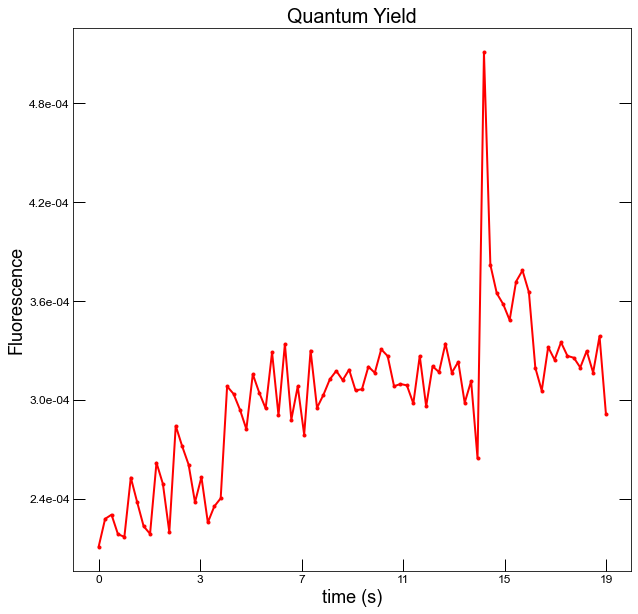

<Figure size 432x288 with 0 Axes>

In [7]:
headers, data = pandas_to_arrays(file)

p.xlabel = "time (s)"
p.ylabel = "Fluorescence"
p.title = "Quantum Yield"
p.majorFormatterx = "%d"

p.marker_list = ["."]
p.linestyle_list = ["-"]
fluo_plot = data[2]-data[6][0:15].mean()
fig = p.plotting(data[1]*0.25, fluo_plot) #1 pulse every 0.25s
p.save_name = "IBPC_pulse"
p.saving(fig)
print("quantum yield: ", (fluo_plot.max() - fluo_plot.min())/fluo_plot.max())

In [8]:

V = VoltageIntensity()
print(V.get_intensity_voltage('blue', 0, 5/100 )*1e6)
#V.get_intensity_voltage("purple", 0, 60/100 )*1e6

-23.393787935901038


In [9]:
data[0]/10000

array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055,
       0.0056, 0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063,
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079])

In [10]:
file = "F:/DREAM/PamFluo/Validation/biophysical_validation/REFERENCE_output_plot.csv"
headers, data = pandas_to_arrays(file)

arrays = [data[6]/4, data[10], data[8]]

p.majorFormatterx = "%0.1f"
p.majorFormattery = "%d"
p.color_list = ['blue', 'purple', 'green']
p.marker_list = [""]*3
p.linestyle_list = ["-"]*3
p.save_name = "pulse_and_probe_sequence"
p.label_list = ["Actinic light", "Saturating pulse", "Measuring pulses"]
p.ylabel = "Amplitude (false levels)"
p.xlabel = "time (s)"
p.title = ""
fig = p.plotting(data[0]/10000, arrays) #1 pulse every 0.25s
plt.legend(prop={"size":p.fontsize})

k = p.saving(fig)

FileNotFoundError: [Errno 2] No such file or directory: 'F:/DREAM/PamFluo/Validation/biophysical_validation/REFERENCE_output_plot.csv'

### Photosynthesis response curve

In [11]:
level_ref = "G:/DREAM/from_github/PAMFluo/specs/config_black.json"

with open(level_ref, 'r') as file:
    black_level = json.load(file)

    fluo_min = black_level["ai1"][1]
    print("minimal level of fluorescsence", fluo_min)
    
    intensity_min = black_level["ai0"][1]
    print("minimal level of intensity",  intensity_min)
        

minimal level of fluorescsence 0.0013973342018303138
minimal level of intensity 0.013942900247945813


In [12]:
def normalize(im, min_target = 0, max_target = 1):
    ''' Normalise image within range [min_target, max_target]'''
    min_val = im.min()
    max_val = im.max()
    im = (im - min_val) * max_target/(max_val - min_val) + min_target
    return im


In [18]:

#files_selected =askopenfilenames(initialdir="G:/DREAM/from_github/PAMFluo/Validation/saturation_evolution")#
files_selected = ["G:/DREAM/from_github/PAMFluo/Validation/saturation_evolution/2021-04-19_13_28__saturation_evolution.csv"]

print(files_selected)

['G:/DREAM/from_github/PAMFluo/Validation/saturation_evolution/2021-04-19_13_28__saturation_evolution.csv']


IndexError: list index out of range

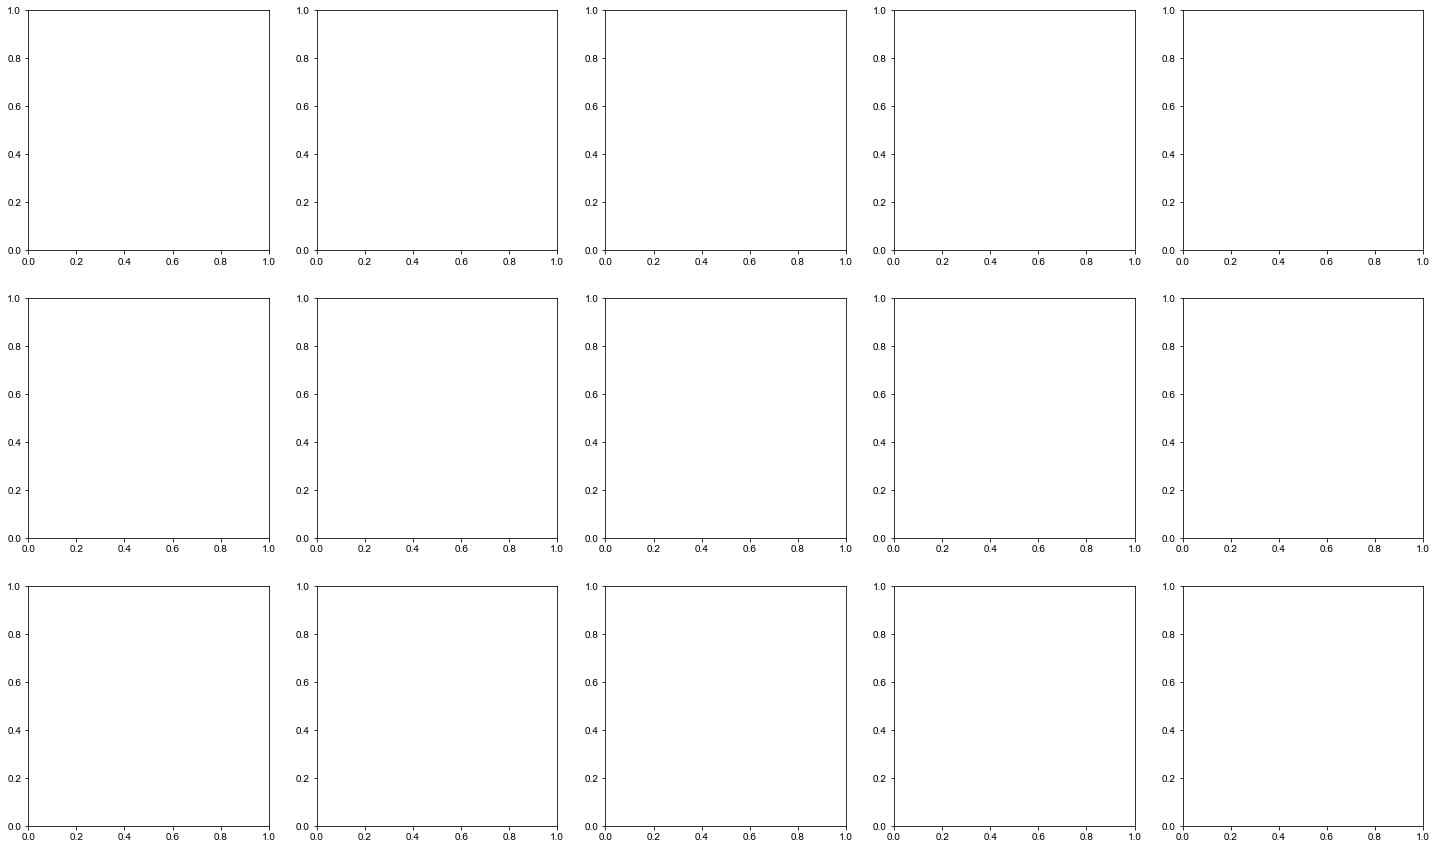

In [19]:

#"G:/DREAM/from_github/PAMFluo/Validation/saturation_evolution/2021-04-19_13_28__saturation_evolution.csv"
test = []
test_2 = []
def pandas_to_arrays(file):
    df = pd.read_csv(file, sep = ',')

    headers = np.array(df.keys())

    data = []
    for head in headers:
        data.append(np.array(df[head]))
        
        
    return headers, data
fig, axs = plt.subplots(3, 5, figsize=(25, 15))

for file in files_selected:
    headers, data = pandas_to_arrays(file)
    

    I = data[1]
    
    fm = data[5]
    f0 = data[3]
    fs = data[4]
    FD = data[6]
    einstein = data[7]
    filter_val = data[8]
    blue_val = data[9]
    V = VoltageIntensity(folder = data[10][0])
    einstein = []     
    #for i, f in enumerate(filter_val):
    #    einstein.append(V.get_MPPC_voltage('blue', f, blue_val[i]/100))
    #einstein = np.array(einstein)
    
    #for i, f in enumerate(filter_val):
    #    einstein.append(V.get_intensity_MPPC('blue', f, I[i]))
    #einstein = np.array(einstein)*1e6
    
    for i, f in enumerate(filter_val):
       einstein.append(V.get_intensity_voltage('blue', f,  blue_val[i]/100))
    einstein = np.array(einstein)*1e6
    

    indices = (blue_val>0)*(blue_val!=500)#*(filter_val==2)#*(FD>10*fluo_min)*(I>intensity_min)

    I = data[1][indices]
    #I = I-I.min() + np.abs(I.min())*0.1
    fm = data[5][indices]
    f0 = data[3][indices]
    fs = data[4][indices]
    FD = data[6][indices]/f0.mean()
    #einstein = data[7][indices]
    einstein = einstein[indices]
    actinic = I
    filter_val = data[8][indices]
    blue_val = data[9][indices]



    plt.xlabel("Actinic intensity")
    
    actinic = einstein
    #I = einstein

    #plt.ylabel("(FM-FS)/FM")
    #plt.plot(actinic, 0.65-0.1*fluo_direct/actinic, '.', label='0.65-0.1*FD/I')
    #plt.plot(I, (fm-fs)/fm, '.', label = "(fm-fs)/fm")
    axs[0][0].loglog(actinic, FD, 'o', label = file[-35:-23])
    axs[0][0].legend()
    axs[0][0].set_title("FD")
    axs[0][1].loglog(actinic, (FD/(I*fm[0])), 'o')#, label = file)
    axs[0][1].set_title("FD/I")
    axs[1][0].plot(actinic, FD, 'o')#, label = file)
    axs[1][0].set_title("FD")
    axs[1][1].plot(actinic, (FD/(I*fm[0])), 'o')#, label = file  
    axs[1][1].set_title("FD/I")
    axs[0][2].plot(actinic, (fm-fs)/fm, 'o') 
    axs[0][2].set_title("(fm-fs)/fm")

    axs[1][2].plot(actinic, (fs-f0)/fs, 'o')    
    axs[1][2].set_title("(fs-f0)/fs")    
    
    axs[0][3].plot(actinic, (fm-fs)/fm*I, 'o')    
    axs[0][3].set_title("(fm-fs)/fm*I")    
    
    axs[1][3].plot(FD/actinic, (fs-f0)/fs, 'o')    
    axs[1][3].set_title("corresfit")    
    
    axs[0][4].plot(I, einstein)
    axs[0][4].set_title("correspondance actinic intensity volts->µeins/m²/s")
    
    axs[1][4].plot(actinic, (fm[0]-fm)/fm, 'o')    
    axs[1][4].set_title("(fm0-fm)/fm")    
    
    axs[2][0].loglog(actinic, fs, 'o')
    axs[2][0].set_title("fs")
    
    axs[2][1].plot(actinic, fs, 'o')
    axs[2][1].set_title("fs")
    
    axs[2][3].plot(actinic, fm, 'o')
    axs[2][3].set_title("fm")
    
    axs[2][2].plot(FD/I, fs, 'o')
    axs[2][2].set_title("corresfit")
        
    
    test.append((fs-f0)/fs)
    test_2.append(FD/I)
    
    #axs[1][5].plot(actinic, (fs/fm[0])*((fm[0]-fm)/fm) + (fm-fs)/fm, 'o-')    
    #axs[1][5].set_title("formula")   
    
    #plt.loglog(I[indices], FD[indices]/I[indices], '.', label = "FD/I")
    #plt.plot(einstein, FD/einstein, '.', label = "FD/I")
    #plt.loglog(einstein[indices], FD[indices], '.', label = "FD/I")

    #plt.plot(einstein[indices],(fm[indices]-fs[indices])/fm[indices], '.', label = "(fm-fs)/fm")
    direct = False
    if direct:
        x0 = [100,100]
        parameters_estimated = optimize.least_squares(residuals,  x0, bounds = (-1e8,1e8),
                                                args = (I, FD/I, platt))
        (M, ek) = parameters_estimated.x

        #axs[1][1].plot(I, platt(parameters_estimated.x,I), label = str(M/ek))
        #axs[1][1].legend()
    #else:
    #    x0 = [1,1,1,1,1,1]
    #    parameters_estimated = optimize.least_squares(residuals,  x0, bounds = (-1e5,1e5),
    #                                            args = (I, FD/I, modele_inverse))
    #    plt.loglog(I, modele_inverse(parameters_estimated.x,I))
    plt.legend()

    #plt.plot(x[:-end],(z[0]-z[:-end])/z[:-end])
    #fs = z*(1-y)
    #plt.plot(x1[:-end], normalize(fs[:-end]))
    #plt.plot(x1[:-end], normalize(fluo_direct[:-end])) 



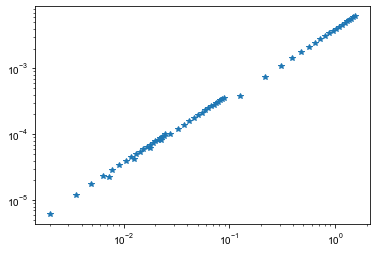

In [20]:
V = VoltageIntensity(folder ="G:\DREAM/from_github/PAMFluo\Experiments/2021-08-04_16_33_bode_diagram" )

inten = []
mppc = []
for f in range(3):
    for val in 10*np.linspace(2, 50, 20):
        inten.append(V.get_intensity_voltage('blue', f,  val/100))
        mppc.append(V.get_MPPC_voltage('blue', f, val/100))
plt.loglog(mppc, inten, "*")


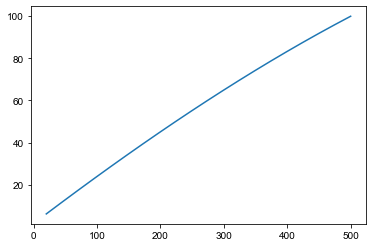

In [21]:
plt.plot(10*np.linspace(2, 50, 20), np.array(inten[40:])*1e6)

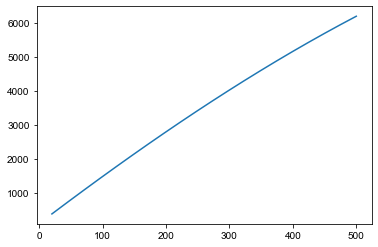

In [22]:
plt.plot(10*np.linspace(2, 50, 20), np.array(inten[0:20])*1e6)

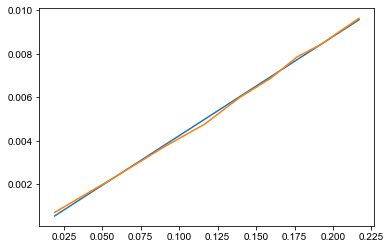

In [23]:
voltage = V.detector_response["blue"][1]
MPPC_voltage = V.detector_response["blue"][2]
intensity = V.intensity["blue"]
func = get_polyfit_func(voltage, MPPC_voltage, 2)
func2 = get_affine_func(MPPC_voltage, intensity)

#plt.plot(voltage, MPPC_voltage)
#plt.plot(voltage, func(voltage))
plt.plot(MPPC_voltage, func2(MPPC_voltage))
plt.plot(MPPC_voltage, intensity)

In [24]:
plt.loglog(filter_val/filter_val.max(), label = "filter")
plt.loglog(blue_val/blue_val.max(), label = 'volt')
plt.loglog(einstein/einstein.max(), label = 'eins')
plt.loglog(I/I.max(), label = 'I')
plt.legend()

NameError: name 'filter_val' is not defined

In [25]:
plt.plot(I, FD)
plt.plot(I, I*(1-(fm-fs)/fm))

NameError: name 'FD' is not defined

In [26]:
blue_val

NameError: name 'blue_val' is not defined

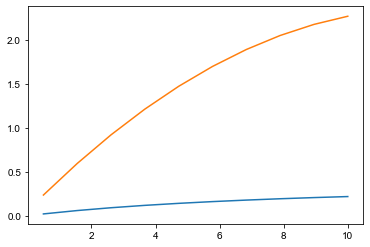

In [27]:
volt_input = V.detector_response['blue'][1]

MPPC_voltage = V.detector_response['blue'][2]

y = V.get_MPPC_voltage('blue', 0, volt_input)

plt.plot(volt_input, MPPC_voltage)
plt.plot(volt_input, y)

In [28]:
file_480 =  "G:/DREAM/from_github/PAMFluo/Experiments/2021-04-20_11_57_bode_diagram/2021-04-20_13_28_Light_intensity_480.csv"


In [29]:
headers, data = pandas_to_arrays(file)
x = data[1]
y = data[2]

headers, data = pandas_to_arrays(file_480)
x_480 = data[1]/20
y_480 = data[2]/20

"""
func = get_func(x_480, y_480)

x = func(x)*1e6
x_hat, y_hat, breaks = multiline_fit(x, y)
p.majorFormatterx = "%d"
p.majorFormattery = "%0.1e"
p.title = "photosynthesis curve"
p.xlabel = "Saturating pulse intensity (µeins/m²/s)"
p.ylabel = "Fluoresccence intensity"
p.marker_list = ["o", ""]
p.linestyle_list = ["", "-"]
p.label_list = ["raw", "interpolation"]
p.ylog = ""
fig = p.plotting([x, x_hat], [y, y_hat])
p.save_name = "Photosynthesis_curve"
p.saving(fig)
x=1
"""

FileNotFoundError: [Errno 2] No such file or directory: 'G:/DREAM/from_github/PAMFluo/Experiments/2021-04-20_11_57_bode_diagram/2021-04-20_13_28_Light_intensity_480.csv'

In [ ]:
plt.plot(x_480/20, y_480/20)

### OJIP

In [33]:
file = 'G:/DREAM/from_github/PAMFluo/Experiments/2021-03-26_17_17_OJIP_pulse/2021-03-26_17_18_ojip_curve.csv'
#askopenfilename()
print(file)

G:/DREAM/from_github/PAMFluo/Experiments/2021-03-26_17_17_OJIP_pulse/2021-03-26_17_18_ojip_curve.csv


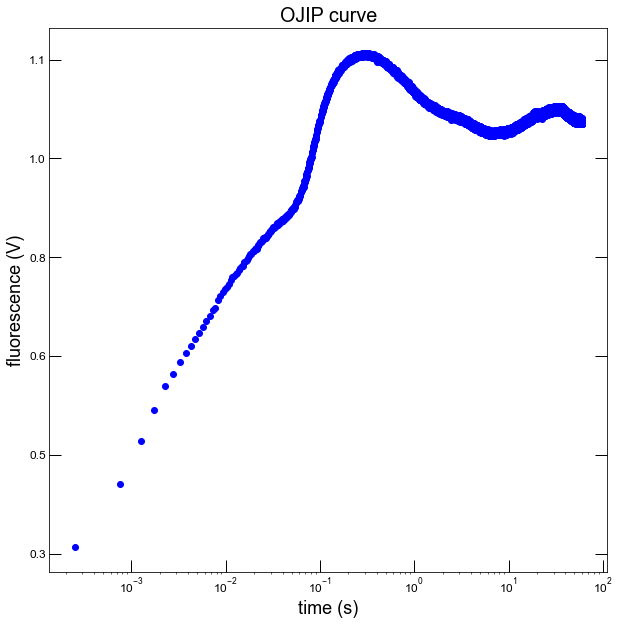

<Figure size 432x288 with 0 Axes>

In [34]:
headers, data = pandas_to_arrays(file)
p.xlabel = "time (s)"
p.ylabel = "fluorescence (V)"
p.title = "OJIP curve"
p.majorFormatterx = "%0.1e"
p.majorFormattery = "%0.1f"
p.ylog = "semilogx"
p.marker_list = ["o", ""]
p.linestyle_list = ["", "-"]
fig = p.plotting(data[1], data[2]) #1 pulse every 0.25s
p.save_name = "OJIP_curve"
p.saving(fig)
x=1